This notebook is a template taken from histolab tutorial.<br>

In [1]:
%matplotlib inline

import os
from pathlib import Path
import pandas as pd
import numpy as np
from glob import glob
from pprint import pprint

dirpath = Path.cwd()
print(dirpath)

/vol/ml/apartin/projects/pdx-histo/nbs


In [2]:
import histolab
from histolab.slide import Slide
from histolab.tiler import RandomTiler, GridTiler, ScoreTiler
from histolab.scorer import NucleiScorer
from histolab.util import apply_mask_image
import openslide
# from openslide import OpenSlide

import matplotlib
import matplotlib.pyplot as plt
import PIL

In [4]:
# Path
datapath = dirpath/'../data'
imgpath = datapath/'doe-globus-pdx-data'  # path to raw WSI data
metapath = datapath/'meta'

# outpath = datapath/'processed'        # path to save processed images
tmp_outpath = datapath/'tmp_out'
os.makedirs(tmp_outpath, exist_ok=True)

# Glob images
wsi_format = 'svs'
files = sorted(imgpath.glob(f'*.{wsi_format}'))
print('Total {} files: {}'.format(wsi_format.upper(), len(files)))

Total SVS files: 596


# Slide and OpenSlide

- biggest_tissue_box_mask:   YES
- dimensions:                YES
- extract_tile:              explore
- level_dimensions:          YES
- levels:                    YES
- locate_biggest_tissue_box: explore
- name:                      YES
- processed_path:            YES
- resampled_array:           YES
- save_scaled_image:         YES
- save_thumbnail:            YES
- scaled_image_path:         YES
- show:                      no
- thumbnail_path:            YES

In [5]:
# Slide instance
# path: path to WSI file
# processed_path: path to save thumbnails and scaled images
fname = files[0]
img_inpath = str(fname)
img_outpath = os.path.join(str(datapath), 'processed', fname.with_suffix('').name)
pdx_slide = Slide(path=img_inpath, processed_path=tmp_outpath)

# Methods and properties of slide object
# pprint(dir(pdx_slide))

# Slide properties
print(f"Type:                  {type(pdx_slide)}")
print(f"Slide name:            {pdx_slide.name}")
print(f"Levels:                {pdx_slide.levels}")
print(f"Dimensions at level 0: {pdx_slide.dimensions}")
print(f"Dimensions at level 1: {pdx_slide.level_dimensions(level=1)}")
print(f"Dimensions at level 2: {pdx_slide.level_dimensions(level=2)}")

Type:                  <class 'histolab.slide.Slide'>
Slide name:            10059
Levels:                [0, 1, 2]
Dimensions at level 0: (15935, 13745)
Dimensions at level 1: (3983, 3436)
Dimensions at level 2: (1991, 1718)


In [6]:
# Openslide properties (_wsi is openslide object)
print(f"type(slide._wsi):            {type(pdx_slide._wsi)}")
print(f"type(slide._wsi.properties): {type(pdx_slide._wsi.properties)}")
print(f"Total properties:            {len(pdx_slide._wsi.properties)}")
print(f"AppMag:                      {pdx_slide._wsi.properties['aperio.AppMag']}")

# Methods and properties of openslide object
# pprint(pdx_slide._wsi.properties._keys())  # all properties

mag = int(pdx_slide._wsi.properties['aperio.AppMag'])
print(f"Level count:       {pdx_slide._wsi.level_count}")
print(f"Level downsamples: {pdx_slide._wsi.level_downsamples}")
print(f"Level dimensions:  {pdx_slide._wsi.level_dimensions}")

type(slide._wsi):            <class 'openslide.OpenSlide'>
type(slide._wsi.properties): <class 'openslide._PropertyMap'>
Total properties:            47
AppMag:                      20
Level count:       3
Level downsamples: (1.0, 4.000522118596585, 8.002048946686164)
Level dimensions:  ((15935, 13745), (3983, 3436), (1991, 1718))


thumbnail_size:          (159, 137)
biggest_tissue_box_mask: (137, 159)
thumbnail_path:          /vol/ml/apartin/projects/pdx-histo/nbs/../data/tmp_out/thumbnails/10059.png
<class 'PIL.Image.Image'>
(159, 137)


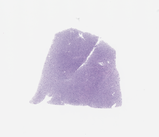

In [7]:
# Thumbnail
print('thumbnail_size:         ', pdx_slide._thumbnail_size)  # thumbnail size proportionally to the slide dimensions
print('biggest_tissue_box_mask:', pdx_slide.biggest_tissue_box_mask.shape)  # thumbnail binary mask of the box containing the max tissue area
print('thumbnail_path:         ', pdx_slide.thumbnail_path)
pdx_slide.save_thumbnail()

# Inside the save_thumbnail
pil_img = pdx_slide._wsi.get_thumbnail(pdx_slide._thumbnail_size)
print(type(pil_img))
print(pil_img.size)
# pil_img.show() # why this doesn't work??
# plt.imshow(pil_img); plt.axis('off');
pil_img.save(tmp_outpath/'pil_img.png', format='png')
pil_img

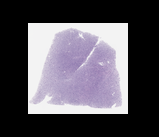

In [8]:
# Apply mask to image
pil_img_boxed = histolab.util.apply_mask_image(pil_img, pdx_slide.biggest_tissue_box_mask)
pil_img_boxed.save(tmp_outpath/'pil_img_boxed.png', format='png')
pil_img_boxed

<class 'numpy.ndarray'>
(859, 995, 3)


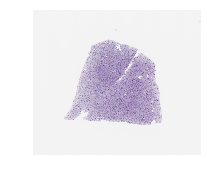

In [9]:
# Scale and save image
# --------------------
# Slide.resampled_array()
# Slide.save_scaled_image()
scale_factor = 16
np_img_scaled = pdx_slide.resampled_array(scale_factor=scale_factor)  # scale and return ndarray
print(type(np_img_scaled))
print(np_img_scaled.shape)
# out image file path: {name}-{scale_factor}x-{large_w}x{large_h}-{new_w}x{new_h}.{IMG_EXT}
pdx_slide.save_scaled_image(scale_factor=scale_factor)             # scale and save into file

# Show img from array
# plt.imshow(img_scaled); plt.axis('off');
fig, ax = plt.subplots(figsize=(3,3)); ax.imshow(np_img_scaled); ax.axis('off');
# PIL.Image.fromarray(np_img_scaled)

In [10]:
# Scale slides and save in each image into file
# ---------------------------------------------
# scaled_img_outpath = str(datapath/'scaled_images')
# os.makedirs(scaled_img_outpath, exist_ok=True)

# scale_factor = 16
# for f_name in files:
#     img_inpath = str(f_name)
#     pdx_slide = Slide(path=img_inpath, processed_path=scaled_img_outpath)
#     pdx_slide.save_scaled_image(scale_factor=scale_factor)             # scale and save into file

# print('Done.')

In [11]:
# Extract tile; TODO
# pdx_slide.extract_slide(coord=, level=0)

In [12]:
# TODO
# pdx_slide.locate_biggest_tissue_box()

## Aggregate metadata from all raw slides

In [13]:
if (metapath/'meta_from_wsi_images.csv').exists():
    meta_df = pd.read_csv(metapath/'meta_from_wsi_images.csv')

In [14]:
# # Aggregate metadata into df from all slides

# meta_list = []  # list of dicts
# for i, fname in enumerate(files):
#     # print(f_name.name)
#     if i % 100 == 0:
#         print(f'slide {i}: {fname.name}')
    
#     # Load slide
#     img_inpath = str(fname)
#     img_outpath = os.path.join(str(datapath), 'processed', fname.with_suffix('').name)
#     pdx_slide = Slide(path=img_inpath, processed_path=img_outpath)

#     # Create dict that contains the slide metadata (properties)
#     ignore_property = ['aperio.User', 'openslide.comment', 'openslide.quickhash-1', 'tiff.ImageDescription']
#     meta = {}
#     for pname in pdx_slide._wsi.properties:
#         # print('{}: {}'.format( p_name, pdx_slide._wsi.properties[p_name] ))
#         if p_name in ignore_property:
#             continue
#         meta[p_name] = pdx_slide._wsi.properties[pname]
        
#     # Append the slide meta to a list
#     meta_list.append(meta)
#     del pdx_slide
    
# # Create df    
# meta_df = pd.DataFrame(meta_list)
# meta_df = meta_df[[c for c in sorted(meta_df.columns)]]
# cols = ['aperio.ImageID'] + [c for c in meta_df.columns if c != 'aperio.ImageID']
# meta_df = meta_df[cols]
# print('Shape', meta_df.shape)

In [15]:
# # Save
# meta_df.to_csv(metapath/'meta_from_wsi_images.csv', index=False)

## Tiling
- For some reason, the extraction region is padded (doesn't span the entire space of slide.dimensions) ??
- It seems that when check_tissue=True, it saves too few tiles with tissue as compared with ...

In [16]:
"""
https://histolab.readthedocs.io/en/latest/api/tiler.html
Extract tiles arranged in a grid and save them to disk, following this filename pattern:
{prefix}tile_{tiles_counter}_level{level}_{x_ul_wsi}-{y_ul_wsi}-{x_br_wsi}-{y_br_wsi}{suffix}
"""
tile_sz = 300
level = 0
# check_tissue = True
check_tissue = False

grid_tiler = GridTiler(
    tile_size=(tile_sz, tile_sz), # (width, height) of the extracted tiles
    level=level,                  # Level from which extract the tiles. Default is 0.
    check_tissue=check_tissue,    # Whether to check if the tile has enough tissue to be saved. Default is True.
    pixel_overlap=0,              # Number of overlapping pixels (for both height and width) between two adjacent tiles.
    prefix='',                    # Prefix to be added to the tile filename. Default is an empty string.
    suffix=".png" # default
)

In [17]:
# Find the smallest slide
idx = meta_df['openslide.level[0].height'].isin( [meta_df['openslide.level[0].height'].min()] )
img_name = meta_df.loc[ idx, 'aperio.ImageID' ].values[0]
fname = imgpath/f'{img_name}.svs'

In [18]:
# Slide instance
# path: path to WSI file
# processed_path: path to save thumbnails and scaled images
img_inpath = str(fname)
sfx = 'tissue' if check_tissue else 'all'
img_outpath = os.path.join(str(datapath), 'tiles', sfx, f'{tile_sz}px', fname.with_suffix('').name)
print(img_outpath)
# os.makedirs(grid_tiles_path, exist_ok=True)
pdx_slide = Slide(path=img_inpath, processed_path=img_outpath)
print(pdx_slide.dimensions)

/vol/ml/apartin/projects/pdx-histo/nbs/../data/tiles/all/300px/27607
(13944, 7515)


In [19]:
grid_tiler.extract(pdx_slide);

	 Tile 0 saved: tile_0_level0_702-70-1002-370.png
	 Tile 1 saved: tile_1_level0_702-370-1002-670.png
	 Tile 2 saved: tile_2_level0_1002-70-1302-370.png
	 Tile 3 saved: tile_3_level0_1002-370-1302-670.png
	 Tile 4 saved: tile_4_level0_1302-70-1602-370.png
	 Tile 5 saved: tile_5_level0_1302-370-1602-670.png
	 Tile 6 saved: tile_6_level0_1602-70-1902-370.png
	 Tile 7 saved: tile_7_level0_1602-370-1902-670.png
	 Tile 8 saved: tile_8_level0_1902-70-2202-370.png
	 Tile 9 saved: tile_9_level0_1902-370-2202-670.png
	 Tile 10 saved: tile_10_level0_2202-70-2502-370.png
	 Tile 11 saved: tile_11_level0_2202-370-2502-670.png
	 Tile 12 saved: tile_12_level0_2502-70-2802-370.png
	 Tile 13 saved: tile_13_level0_2502-370-2802-670.png
	 Tile 14 saved: tile_14_level0_2802-70-3102-370.png
	 Tile 15 saved: tile_15_level0_2802-370-3102-670.png
	 Tile 16 saved: tile_16_level0_3102-70-3402-370.png
	 Tile 17 saved: tile_17_level0_3102-370-3402-670.png
	 Tile 18 saved: tile_18_level0_3402-70-3702-370.png
	 Tile

## Extract Tiles Based on Score

In [ ]:
from histolab.scorer import NucleiScorer

## Try Filters

## Try Morphological filters

## TCGA data
First things first, let’s import some data to work with, for example the prostate tissue slide and the ovarian tissue slide available in the`data` module:

In [1]:
from histolab.data import prostate_tissue, ovarian_tissue

<div class="alert alert-block alert-info">
<b>Note:</b> To  use  the <mark>data</mark>  module,  you  need  to  install <mark><a href=”https://pypi.org/project/pooch/">pooch</a></mark>. This step is needless if we are using the Vagrant/Docker virtual environment.</div>

The calling to a  `data` function will automatically download the WSIs from the corresponding repository and save the slide in a cached directory:

In [2]:
prostate_svs, prostate_path = prostate_tissue()
ovarian_svs, ovarian_path = ovarian_tissue()

Notice that each  `data` function outputs the corresponding slide, as an *OpenSlide* object, and the path where the slide has been saved.

In [3]:
print(prostate_path)
print(ovarian_path)

/Users/apartin/Library/Caches/histolab-images/0.1.0/data/../tcga/prostate/6b725022-f1d5-4672-8c6c-de8140345210
/Users/apartin/Library/Caches/histolab-images/0.1.0/data/../tcga/ovarian/b777ec99-2811-4aa4-9568-13f68e380c86


## Slide initialization

`histolab` maps a WSI file into a `Slide` object. Each usage of a WSI requires a 1-o-1 association with a `Slide` object contained in the`slide` module:

In [4]:
from histolab.slide import Slide

To initialize a `Slide` it is necessary to specify the WSI path, and the `processed_path` where the thumbnail and the tiles will be saved. In our example, we want the `processed_path` of each slide to be a subfolder of the current working directory:

In [5]:
import os

BASE_PATH = os.getcwd()

PROCESS_PATH_PROSTATE = os.path.join(BASE_PATH, 'prostate', 'processed')
PROCESS_PATH_OVARIAN  = os.path.join(BASE_PATH, 'ovarian', 'processed')

# path: path where the WSI is saved
# prostate_path: path where thumbnails and scaled images will be saved to.
prostate_slide = Slide(path=prostate_path, processed_path=PROCESS_PATH_PROSTATE)
ovarian_slide  = Slide(path=ovarian_path, processed_path=PROCESS_PATH_OVARIAN)

<div class="alert alert-block alert-info">
<b>Note:</b> If our slides were stored in the same folder, this can be done directly on the whole dataset by calling the <mark>SlideSet</mark> object of the <mark>slide</mark> module.</div>

With a `Slide` object we can easily retrieve information about the slide, such as the slide name, the number of available levels, the dimensions at native magnification or at a specified level:

In [6]:
print(f"Slide name: {prostate_slide.name}")

print(f"Levels: {prostate_slide.levels}")

print(f"Dimensions at level 0: {prostate_slide.dimensions}")

print(f"Dimensions at level 1: {prostate_slide.level_dimensions(level=1)}")

print(f"Dimensions at level 2: {prostate_slide.level_dimensions(level=2)}")

Slide name: 6b725022-f1d5-4672-8c6c-de8140345210
Levels: [0, 1, 2]
Dimensions at level 0: (16000, 15316)
Dimensions at level 1: (4000, 3829)
Dimensions at level 2: (2000, 1914)


In [7]:
print(f"Slide name: {ovarian_slide.name}")

print(f"Levels: {ovarian_slide.levels}")

print(f"Dimensions at level 0: {ovarian_slide.dimensions}")

print(f"Dimensions at level 1: {ovarian_slide.level_dimensions(level=1)}")

print(f"Dimensions at level 2: {ovarian_slide.level_dimensions(level=2)}")

Slide name: b777ec99-2811-4aa4-9568-13f68e380c86
Levels: [0, 1, 2]
Dimensions at level 0: (30001, 33987)
Dimensions at level 1: (7500, 8496)
Dimensions at level 2: (1875, 2124)


Moreover, we can save and show the slide thumbnail in a separate window. In particular, the thumbnail image will be automatically saved in a subdirectory of the `processed_path`:

In [8]:
prostate_slide.save_thumbnail()
print(f"Thumbnails saved at: {prostate_slide.thumbnail_path}")

Thumbnails saved at: /Users/apartin/work/jdacs/pdx-img-code/prostate/processed/thumbnails/6b725022-f1d5-4672-8c6c-de8140345210.png


In [9]:
# prostate_slide.show()

In [10]:
ovarian_slide.save_thumbnail()
print(f"Thumbnails saved at: {ovarian_slide.thumbnail_path}")

Thumbnails saved at: /Users/apartin/work/jdacs/pdx-img-code/ovarian/processed/thumbnails/b777ec99-2811-4aa4-9568-13f68e380c86.png


In [11]:
# ovarian_slide.show()

## Tiles extraction

Once that our `Slide` objects are defined, we can proceed to extract the tiles. To speed up the extraction process, `histolab` automatically detects the tissue region with the largest connected area and crops the tiles within this field. The `tiler` module implements different strategies for the tiles extraction and provides an intuitive interface to easily retrieve a tile dataset suitable for our task. In particular, each extraction method is customizable with several common parameters:

P1) `tile_size`: the tile size;

P2) `level`: the extraction level (from 0 to the number of available levels);

P3) `check_tissue`: if a minimum percentage of tissue is required to save the tiles (default is 80\%);

P4) `prefix`: a prefix to be added at the beginning of the tiles' filename (default is the empty string);

P5) `suffix`: a suffix to be added to the end of the tiles' filename (default is `.png`).

### Random extraction

The simplest approach we may adopt is to randomly crop a fixed number of tiles from our slides; in this case, we need the `randomtiler` extractor:

In [12]:
from histolab.tiler import RandomTiler

Let's suppose that we want to randomly extract 6 squared tiles at level 2 of size 512 from our prostate slide, and that we want to save them only if they have at least 80\% of tissue inside. We then initialize our `randomtiler` extractor as follows:

In [13]:
PROSTATE_RANDOM_TILES_PATH = os.path.join(PROCESS_PATH_PROSTATE, 'random') # save tiles in the 'random' subdirectory

random_tiles_extractor = RandomTiler(
    tile_size=(512, 512),
    n_tiles=6,          # Maximum number of tiles to extract
    level=2,
    seed=42,
    check_tissue=True,  # Whether to check if the tile has enough tissue to be saved
    prefix=PROSTATE_RANDOM_TILES_PATH, 
    suffix=".png" # default
)

Notice that we also specify the random seed to ensure the reproducibility of the derived dataset.

Starting the extraction is as simple as calling the `extract` method on our slide:

In [14]:
random_tiles_extractor.extract(prostate_slide)

	 Tile 0 saved: /Users/apartin/work/jdacs/pdx-img-code/prostate/processed/randomtile_0_level2_4400-8608-8496-12706.png
	 Tile 1 saved: /Users/apartin/work/jdacs/pdx-img-code/prostate/processed/randomtile_1_level2_5700-7307-9796-11404.png
	 Tile 2 saved: /Users/apartin/work/jdacs/pdx-img-code/prostate/processed/randomtile_2_level2_3400-1901-7496-5999.png
	 Tile 3 saved: /Users/apartin/work/jdacs/pdx-img-code/prostate/processed/randomtile_3_level2_4700-6206-8796-10303.png
	 Tile 4 saved: /Users/apartin/work/jdacs/pdx-img-code/prostate/processed/randomtile_4_level2_4200-5605-8296-9702.png
	 Tile 5 saved: /Users/apartin/work/jdacs/pdx-img-code/prostate/processed/randomtile_5_level2_1900-1601-5996-5698.png
6 Random Tiles have been saved.


## super important!

In [15]:
# (ap) Note that the generated tiles have size that is not consistent with the specified tile_size.
# That's because the tile_size defines the number of units (pixel) in the level 0, while we're acquiring level 2.
lv0 = prostate_slide.level_dimensions(level=0)
lv2 = prostate_slide.level_dimensions(level=2)
x_scale = lv0[0]/lv2[0]
y_scale = lv0[1]/lv2[1]
print((8496-4400)/x_scale)
print((12706-8608)/x_scale)

512.0
512.25


### Grid extraction

Instead of picking tiles at random, we may want to retrieve all the tissue available. The `gridtiler` extractor crops the tiles following a grid structure on the largest tissue region detected in the WSI:

In [16]:
from histolab.tiler import GridTiler

In our example, we want to extract squared tiles at level 0 of size 512 from our ovarian slide, independently of the amount of tissue detected. By default, tiles will not overlap, namely the parameter defining the number of overlapping pixels between two adjacent tiles, `pixel_overlap`, is set to zero:

In [17]:
OVARIAN_GRID_TILES_PATH = os.path.join(PROCESS_PATH_OVARIAN, 'grid') # save tiles in the 'grid' subdirectory

grid_tiles_extractor = GridTiler(
    tile_size=(512, 512),
    level=0,
    # check_tissue=False,
    check_tissue=True,
    pixel_overlap=0,  # Number of overlapping pixels (for both height and width) between two adjacent tiles.
    prefix=OVARIAN_GRID_TILES_PATH, 
    suffix=".png" # default
)

Again, the extraction process starts when the extract method is called on our slide:

In [18]:
grid_tiles_extractor.extract(ovarian_slide)

	 Tile 0 saved: /Users/apartin/work/jdacs/pdx-img-code/ovarian/processed/gridtile_0_level0_9292-1736-9804-2248.png
	 Tile 1 saved: /Users/apartin/work/jdacs/pdx-img-code/ovarian/processed/gridtile_1_level0_8780-2248-9292-2760.png
	 Tile 2 saved: /Users/apartin/work/jdacs/pdx-img-code/ovarian/processed/gridtile_2_level0_9292-2248-9804-2760.png
	 Tile 3 saved: /Users/apartin/work/jdacs/pdx-img-code/ovarian/processed/gridtile_3_level0_9804-2248-10316-2760.png
	 Tile 4 saved: /Users/apartin/work/jdacs/pdx-img-code/ovarian/processed/gridtile_4_level0_11340-2248-11852-2760.png
	 Tile 5 saved: /Users/apartin/work/jdacs/pdx-img-code/ovarian/processed/gridtile_5_level0_11852-2248-12364-2760.png
	 Tile 6 saved: /Users/apartin/work/jdacs/pdx-img-code/ovarian/processed/gridtile_6_level0_8780-2760-9292-3272.png
	 Tile 7 saved: /Users/apartin/work/jdacs/pdx-img-code/ovarian/processed/gridtile_7_level0_5708-3272-6220-3784.png
	 Tile 8 saved: /Users/apartin/work/jdacs/pdx-img-code/ovarian/processed/gr

### Score-based extraction

According to the task addressed, the tiles extracted may not be equally informative.

The `ScoreTiler` allows us to save only the "best" tiles, among all the ones extracted with a grid structure, based on a specific scoring function. 

For example, let's suppose that our goal is the detection of mitotic activity on our ovarian slide. In this case, tiles with a higher presence of nuclei are preferable over tile with little or no nuclei. We can leverage the `NucleiScorer` function of the `scorer` module to order the extracted tiles based on the proportion of the tissue and of the hematoxylin staining.

In particular, the score is computed as $N_t\cdot\mathrm{tanh}(T_t)$, where $N_t$ is the percentage of nuclei and $T_t$ the percentage of tissue in the tile $t$.

First, we need the extractor and the scorer:

In [28]:
from histolab.tiler import ScoreTiler
from histolab.scorer import NucleiScorer

As the `ScoreTiler` extends the `GridTiler` extractor, we also set the `pixel_overlap` as additional parameter. Moreover, we can specify the number of the top tiles we want to save with the `n_tile` parameter:

In [29]:
OVARIAN_SCORED_TILES_PATH = os.path.join(PROCESS_PATH_OVARIAN, 'scored') # save tiles in the 'scored' subdirectory

scored_tiles_extractor = ScoreTiler(
    scorer = NucleiScorer(),
    tile_size=(512, 512),
    n_tiles=0, 
    level=0,
    check_tissue=True, 
    pixel_overlap=0, # default 
    prefix=OVARIAN_SCORED_TILES_PATH, 
    suffix=".png" # default
)

Finally, when we extract our cropped images, we can also write a report of the saved tiles and their scores in a CSV file:

In [30]:
summary_filename = 'summary_ovarian_tiles.csv'
SUMMARY_PATH = os.path.join(OVARIAN_SCORED_TILES_PATH, summary_filename)
os.makedirs(OVARIAN_SCORED_TILES_PATH, exist_ok=True)

In [31]:
scored_tiles_extractor.extract(ovarian_slide, report_path=SUMMARY_PATH)

	 Tile 0 - score: 0.4079342437639002 saved: /Users/apartin/work/jdacs/pdx-img-code/ovarian/processed/scoredtile_0_level0_2124-14024-2636-14536.png
	 Tile 1 - score: 0.37629845545219753 saved: /Users/apartin/work/jdacs/pdx-img-code/ovarian/processed/scoredtile_1_level0_8780-2760-9292-3272.png
	 Tile 2 - score: 0.37373757205425406 saved: /Users/apartin/work/jdacs/pdx-img-code/ovarian/processed/scoredtile_2_level0_9292-2248-9804-2760.png
	 Tile 3 - score: 0.3678220410300638 saved: /Users/apartin/work/jdacs/pdx-img-code/ovarian/processed/scoredtile_3_level0_8780-2248-9292-2760.png
	 Tile 4 - score: 0.36503579581920026 saved: /Users/apartin/work/jdacs/pdx-img-code/ovarian/processed/scoredtile_4_level0_23628-21704-24140-22216.png
	 Tile 5 - score: 0.36312350641706215 saved: /Users/apartin/work/jdacs/pdx-img-code/ovarian/processed/scoredtile_5_level0_3148-7368-3660-7880.png
	 Tile 6 - score: 0.3592006139520371 saved: /Users/apartin/work/jdacs/pdx-img-code/ovarian/processed/scoredtile_6_level0